# 🎯 Ejemplo de ajuste no lineal del Movimiento Armónico Simple (M.A.S.)

En esta notebook aprenderás a:
- Cargar tus datos experimentales desde un archivo `.txt` exportado de Logger Pro
- Acotar el intervalo de análisis a un tramo aproximadamente periódico
- Ajustar las ecuaciones del Movimiento Armónico Simple (M.A.S.)
- Visualizar y comparar tus datos con el modelo ajustado

---

In [1]:
# 📥 Carga de datos desde archivo exportado
import numpy as np

# Ruta del archivo .txt exportado desde Logger Pro
ruta_archivo = "Datos-prueba/biela-manivela-30Hz-08-05-2025.txt"

# Cargar el archivo (ajustar skip_header si es necesario)
data = np.genfromtxt(ruta_archivo, skip_header=7)

# Verifica las primeras filas
print("Primeras filas del archivo completo:")
print(data[:5])

Primeras filas del archivo completo:
[[ 0.033333    0.3706115   0.44504695  0.2114018   0.17453293  4.82879255
   2.87985086]
 [ 0.066666    0.385189    0.45340766  0.07997538  0.33161256  4.945149
   2.41078424]
 [ 0.099999    0.4004525   0.46219712 -0.25221723  0.50614548  4.98296484
   2.47259923]
 [ 0.133332    0.4169165   0.44518987 -0.79445391  0.66322512  5.04696089
   4.05554755]
 [ 0.166665    0.430808    0.40574447 -1.25632217  0.83775804  5.25058467
   5.57789296]]


In [2]:
# 🔍 Acotado de datos por intervalo de tiempo
# Elegimos un intervalo donde la señal de aceleración sea aproximadamente periódica

t_total = data[:, 0]  # columna de tiempo

# Define el rango de tiempo (ajustable por el alumno)
t_min = 0
t_max = 12

# Crear máscara y aplicar
mascara = (t_total >= t_min) & (t_total <= t_max)
datos = data[mascara]

# Separar columnas

#t, x, omega, alpha, theta, v, a = datos.T
#t, x, omega, alpha, theta, v, a = datos.T

t, x, v, a, theta, omega, alpha = datos.T

print(theta)

print(f"Datos acotados entre t = {t_min}s y {t_max}s. Total de muestras: {len(t)}")

[ 0.17453293  0.33161256  0.50614548  0.66322512  0.83775804  1.01229097
  1.20427718  1.3962634   1.58824962  1.76278254  1.90240888  2.05948852
  2.19911486  2.32128791  2.46091425  2.58308729  2.70526034  2.84488668
  2.98451302  3.10668607  3.24631241  3.38593875  3.52556509  3.64773814
  3.76991118  3.89208423  4.01425728  4.13643033  4.25860337  4.38077642
  4.52040276  4.6600291   4.79965544  4.92182849  5.06145483  5.18362788
  5.30580093  5.44542727  5.56760031  5.70722665  5.84685299  5.98647933
  6.14355897  6.28318531  6.44026494  6.59734457  6.75442421  6.91150384
  7.08603676  7.2431164   7.40019603  7.55727566  7.71435529  7.85398163
  7.99360797  8.15068761  8.29031395  8.42994029  8.58701992  8.72664626
  8.88372589  9.02335223  9.18043187  9.32005821  9.47713784  9.61676418
  9.75639052  9.89601686 10.0356432  10.15781625 10.29744259 10.41961563
 10.55924197 10.69886831 10.82104136 10.9606677  11.10029404 11.22246709
 11.34464014 11.46681319 11.57153294 11.69370599 11

In [3]:
# 🧮 Ajuste no lineal de x(t) usando modelo del M.A.S.
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def x_mas(t, A0, A, w, phi):
    return A0 + A * np.cos(w * t + phi)

# Estimar valores iniciales
A0_est = (np.max(x) + np.min(x)) / 2
A_est = (np.max(x) - np.min(x)) / 2
f = 5 / 8
w_est = 2 * np.pi * f   # Hz = 1 ciclo/seg

p0 = [A0_est, A_est, w_est, 1]
popt, _ = curve_fit(x_mas, t, x, p0=p0)

# Valores ajustados
A0_fit, A_fit, w_fit, phi_fit = popt
print(f"A0 = {A0_fit:.4f}, A = {A_fit:.4f}, ω = {w_fit:.4f}, φ = {phi_fit:.4f}")

Matplotlib is building the font cache; this may take a moment.


A0 = 0.4010, A = 0.0845, ω = 4.1593, φ = -1.8570


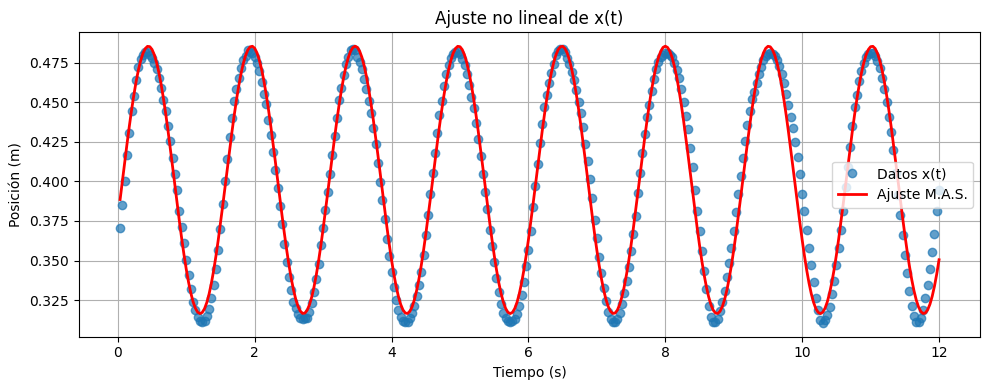

In [4]:
# 📈 Gráfica de comparación
x_ajustada = x_mas(t, *popt)

plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Datos x(t)", marker='o', linestyle='', alpha=0.7)
plt.plot(t, x_ajustada, label="Ajuste M.A.S.", color='red', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Ajuste no lineal de x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧮 Ajuste de velocidad y aceleración

Utilizamos las expresiones derivadas del M.A.S. para ajustar los datos de velocidad y aceleración:

In [5]:
# --- Definiciones de funciones ---
def v_mas(t, A, w, phi):
    return -w * A * np.sin(w * t + phi)

def a_mas(t, A, w, phi):
    return -w**2 * A * np.cos(w * t + phi)

# --- Ajuste de velocidad ---
popt_v, _ = curve_fit(v_mas, t, v, p0=[A_fit, w_fit, phi_fit])
v_ajustada = v_mas(t, *popt_v)

# --- Ajuste de aceleración ---
popt_a, _ = curve_fit(a_mas, t, a, p0=[A_fit, w_fit, phi_fit])
a_ajustada = a_mas(t, *popt_a)

# Mostrar parámetros
print("Parámetros del ajuste de velocidad: A = {:.4f}, ω = {:.4f}, φ = {:.4f}".format(*popt_v))
print("Parámetros del ajuste de aceleración: A = {:.4f}, ω = {:.4f}, φ = {:.4f}".format(*popt_a))

Parámetros del ajuste de velocidad: A = 0.0858, ω = 4.1638, φ = -1.8706
Parámetros del ajuste de aceleración: A = 0.0857, ω = 4.1532, φ = -1.8074


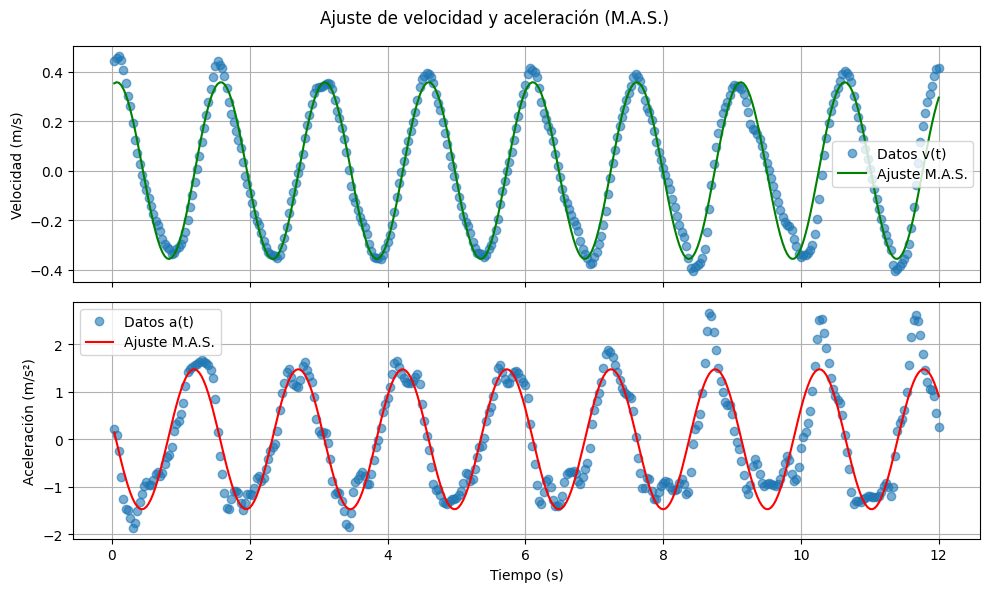

In [6]:
# --- Gráficas comparativas ---
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Velocidad
axs[0].plot(t, v, label="Datos v(t)", marker='o', linestyle='', alpha=0.6)
axs[0].plot(t, v_ajustada, label="Ajuste M.A.S.", color='green')
axs[0].set_ylabel("Velocidad (m/s)")
axs[0].legend()
axs[0].grid(True)

# Aceleración
axs[1].plot(t, a, label="Datos a(t)", marker='o', linestyle='', alpha=0.6)
axs[1].plot(t, a_ajustada, label="Ajuste M.A.S.", color='red')
axs[1].set_ylabel("Aceleración (m/s²)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("Ajuste de velocidad y aceleración (M.A.S.)")
plt.tight_layout()
plt.show()

[ 0.17453293  0.33161256  0.50614548  0.66322512  0.83775804  1.01229097
  1.20427718  1.3962634   1.58824962  1.76278254  1.90240888  2.05948852
  2.19911486  2.32128791  2.46091425  2.58308729  2.70526034  2.84488668
  2.98451302  3.10668607  3.24631241  3.38593875  3.52556509  3.64773814
  3.76991118  3.89208423  4.01425728  4.13643033  4.25860337  4.38077642
  4.52040276  4.6600291   4.79965544  4.92182849  5.06145483  5.18362788
  5.30580093  5.44542727  5.56760031  5.70722665  5.84685299  5.98647933
  6.14355897  6.28318531  6.44026494  6.59734457  6.75442421  6.91150384
  7.08603676  7.2431164   7.40019603  7.55727566  7.71435529  7.85398163
  7.99360797  8.15068761  8.29031395  8.42994029  8.58701992  8.72664626
  8.88372589  9.02335223  9.18043187  9.32005821  9.47713784  9.61676418
  9.75639052  9.89601686 10.0356432  10.15781625 10.29744259 10.41961563
 10.55924197 10.69886831 10.82104136 10.9606677  11.10029404 11.22246709
 11.34464014 11.46681319 11.57153294 11.69370599 11

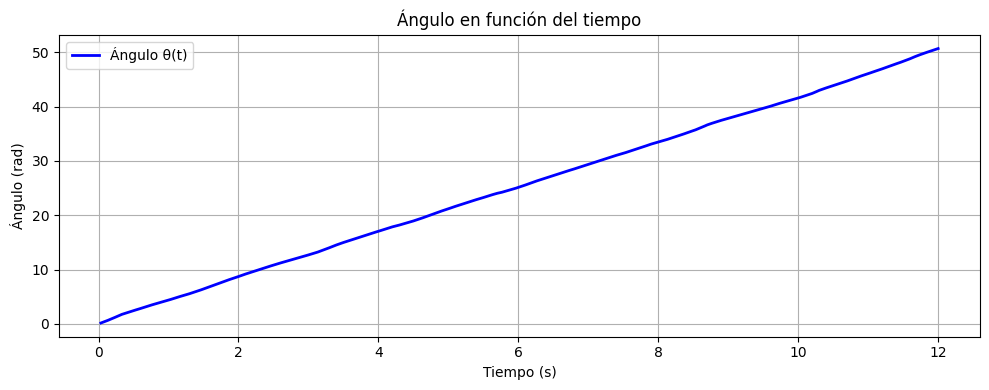

In [7]:
# 📈 Gráfica del ángulo (theta) en función del tiempo
print(theta)
plt.figure(figsize=(10, 4))
plt.plot(t, theta, label="Ángulo θ(t)", color='blue', linewidth=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (rad)")
plt.title("Ángulo en función del tiempo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


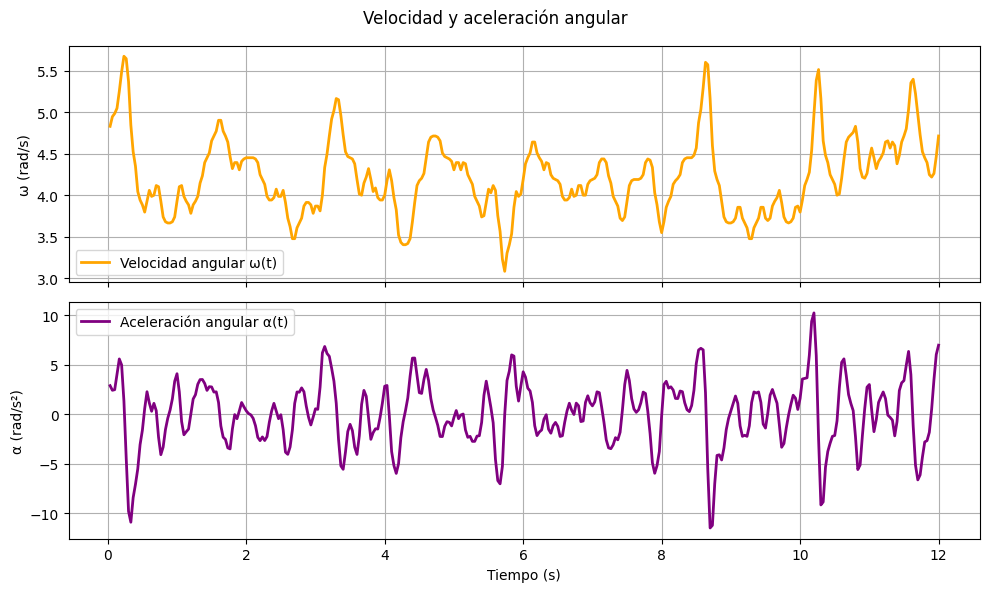

In [8]:
# 📈 Gráfica de velocidad y aceleración angular
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Velocidad angular (omega)
axs[0].plot(t, omega, label="Velocidad angular ω(t)", color='orange', linewidth=2)
axs[0].set_ylabel("ω (rad/s)")
axs[0].grid(True)
axs[0].legend()

# Aceleración angular (alpha)
axs[1].plot(t, alpha, label="Aceleración angular α(t)", color='purple', linewidth=2)
axs[1].set_ylabel("α (rad/s²)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].grid(True)
axs[1].legend()

plt.suptitle("Velocidad y aceleración angular")
plt.tight_layout()
plt.show()


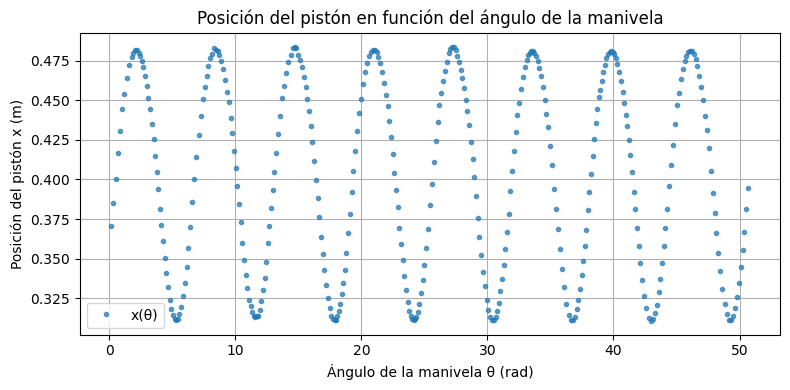

In [9]:
# 📈 Gráfica de posición x en función del ángulo theta
plt.figure(figsize=(8, 4))
plt.plot(theta, x, 'o', markersize=3, alpha=0.7, label="x(θ)")
plt.xlabel("Ángulo de la manivela θ (rad)")
plt.ylabel("Posición del pistón x (m)")
plt.title("Posición del pistón en función del ángulo de la manivela")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Ajuste x(θ): A0 = 0.4022, A = -0.0855, φ = 0.9956


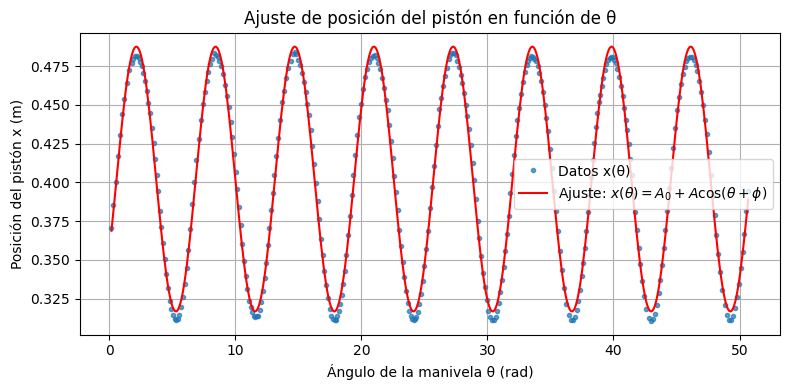

In [10]:
from scipy.optimize import curve_fit

# --- Definición del modelo ---
def x_theta_model(theta, A0, A, phi):
    return A0 + A * np.cos(theta + phi)

# --- Estimaciones iniciales ---
A0_est = np.mean(x)
A_est = (np.max(x) - np.min(x)) / 2
phi_est = 0.0
p0 = [A0_est, A_est, phi_est]

# --- Ajuste ---
params, _ = curve_fit(x_theta_model, theta, x, p0=p0)
A0_fit, A_fit, phi_fit = params
print(f"Ajuste x(θ): A0 = {A0_fit:.4f}, A = {A_fit:.4f}, φ = {phi_fit:.4f}")

# --- Valores ajustados ---
theta_fit = np.linspace(np.min(theta), np.max(theta), 500)
x_fit = x_theta_model(theta_fit, *params)

# --- Gráfica ---
plt.figure(figsize=(8, 4))
plt.plot(theta, x, 'o', markersize=3, label="Datos x(θ)", alpha=0.7)
plt.plot(theta_fit, x_fit, '-', color='red', label="Ajuste: $x(\\theta) = A_0 + A \\cos(\\theta + \\phi)$")
plt.xlabel("Ángulo de la manivela θ (rad)")
plt.ylabel("Posición del pistón x (m)")
plt.title("Ajuste de posición del pistón en función de θ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


0.033333
Harmónico 1 ➜  f1 = 0.667 Hz,  A1 = 1.4704,  φ1 = 1.261 rad
Harmónico 2 ➜  f2 = 1.333 Hz,  A2 = 0.3467,  φ2 = 2.080 rad


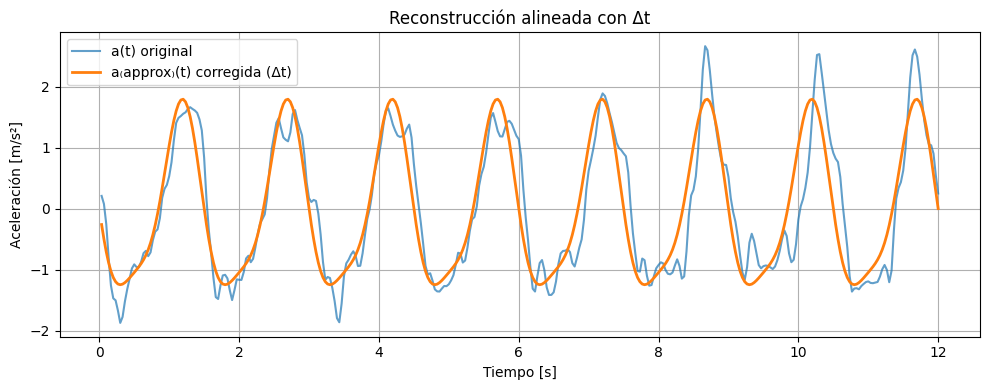

In [11]:
# -----------------------------------------------------------
# 🔉 1. Transformada Discreta de Fourier (DFT) de a(t)
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --- FFT ---
N  = len(a)                      # número de muestras

print(t[1]-t[0])

dt = t[1] - t[0]                 # periodo de muestreo
fs = 1 / dt                      # frecuencia de muestreo
A_f = np.fft.rfft(a - np.mean(a))          # quitamos la componente DC
freqs = np.fft.rfftfreq(N, d=dt)           # vector de frecuencias

# Módulo del espectro escalado para “amplitud de coseno”
mag = 2 * np.abs(A_f) / N        # factor 2 para compensar la mitad negativa
mag[0] = 0                       # ignoramos la componente DC

# -----------------------------------------------------------
# 🔍 2. Detección de los dos armónicos dominantes
# -----------------------------------------------------------
# Índices de los dos picos más altos
idx_peaks = np.argsort(mag)[-2:]               # 2 mayores
idx_peaks = idx_peaks[np.argsort(freqs[idx_peaks])]  # ordenados por frecuencia

# Parámetros extraídos
f1, f2       = freqs[idx_peaks]                # Hz
A1, A2       = mag[idx_peaks]                  # amplitudes
phi1, phi2   = np.angle(A_f[idx_peaks])        # radianes

print(f"Harmónico 1 ➜  f1 = {f1:.3f} Hz,  A1 = {A1:.4f},  φ1 = {phi1:.3f} rad")
print(f"Harmónico 2 ➜  f2 = {f2:.3f} Hz,  A2 = {A2:.4f},  φ2 = {phi2:.3f} rad")

delta_t = t[0]  # = 4.0 s // Shifteo para que encajen

# Reconstrucción con compensación de desfase
a_approx_shifted = (
    A1 * np.cos(2 * np.pi * f1 * t + phi1 + 2 * np.pi * f1 * delta_t) +
    A2 * np.cos(2 * np.pi * f2 * t + phi2 + 2 * np.pi * f2 * delta_t)
)

plt.figure(figsize=(10, 4))
plt.plot(t, a, label='a(t) original', alpha=0.7)
plt.plot(t, a_approx_shifted, label='a₍approx₎(t) corregida (Δt)', linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel("Aceleración [m/s²]")
plt.title("Reconstrucción alineada con Δt")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


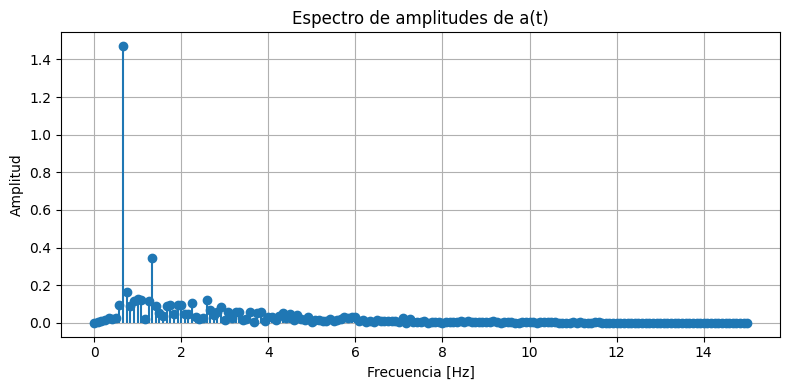

In [12]:
plt.figure(figsize=(8, 4))
plt.stem(freqs, mag, basefmt=" ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.title("Espectro de amplitudes de a(t)")
plt.grid(True)
plt.tight_layout()
plt.show()
